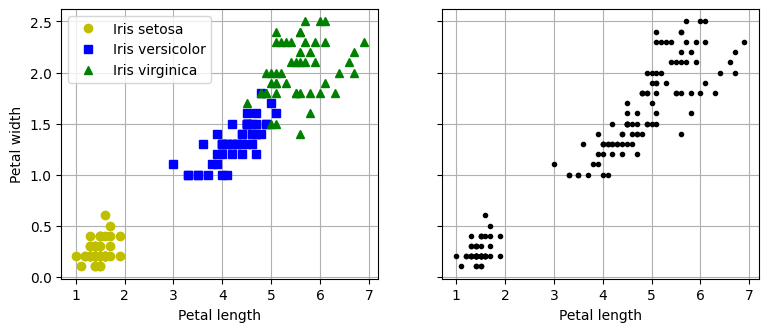

In [ ]:
#Clustering vs Classification
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()


**Introducetion to Clustering**

Cluster analysis aims to divide input data into groups of similar instances, where items within the same group share more similarities with each other than with items in different groups. This tutorial will demonstrate several clustering techniques using the scikit-learn library.

 K-Means Clustering
The K-Means algorithm represents each cluster by its centroid. It divides the data into k distinct clusters through two main steps, repeated iteratively:

Assign each data point to the nearest centroid, forming k clusters.
Recalculate each cluster’s centroid based on the assigned points.
In this section, we’ll apply K-Means clustering to a sample dataset of movie ratings, beginning with dataset creation.

In [ ]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5



In this sample dataset, the first three users preferred action movies (Jaws and Star Wars), while the last three showed a preference for horror films (The Exorcist and The Omen). Our aim is to use K-Means clustering to group users based on their movie preferences.

In the example below, we apply K-Means clustering with k=2 to the movie ratings data. Before running the clustering algorithm, we need to remove the "user" column. The resulting cluster assignments for each user are displayed in a dataframe.

In [ ]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

,Cluster ID
user,
john,0
mary,0
bob,0
lisa,1
lee,1
harry,1



The K-Means algorithm groups the first three users into one cluster and the last three users into a second cluster, aligning with our expectations. Additionally, we can display the centroids for each of the two clusters.

In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,4.333333,4.666667,3.0,2.000000
1,1.666667,1.666667,4.0,4.666667


In [ ]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,0
1,kim,3,2,4,4,1
2,liz,2,3,4,1,0
3,tom,3,2,3,3,1
4,bill,5,4,1,4,0


To find the optimal number of clusters, we can apply K-Means with different cluster counts, ranging from 1 to 6, and calculate the corresponding sum of squared errors (SSE) for each. The "elbow" point in the SSE vs. number of clusters plot can help estimate the ideal number of clusters, as shown in the example below.

Text(0, 0.5, 'SSE')

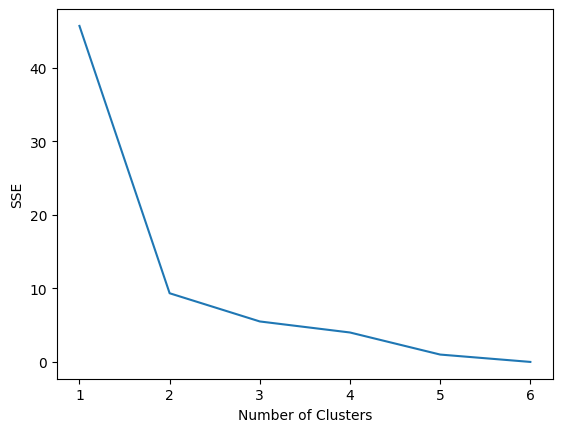

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


**Hierarchical Clustering**
In this section, we explore hierarchical clustering by applying it to the vertebrate dataset. Hierarchical clustering is a method of creating clusters in a tree-like structure, where each data point starts as its own cluster, and clusters are progressively merged based on their similarity until only one cluster remains.

We will use three different hierarchical clustering methods available in Python’s scipy library:

* Single Link (MIN): In this approach, the distance between two clusters is defined as the shortest distance between any two points in each cluster. Single-link clustering can result in elongated, chain-like clusters.

* Complete Link (MAX): Here, the distance between clusters is defined as the maximum distance between any two points in each cluster. Complete-link clustering tends to form compact, spherical clusters.

* Group Average: This method uses the average distance between all pairs of points from two clusters. It balances the chaining tendency of single link and the compactness of complete link.

In [ ]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


**Single Link (MIN)**

The code below will genertae a dendrogram which would be useful for understanding how different animals relate based on chosen characteristics and may help infer possible classification categories or groupings based on shared features.

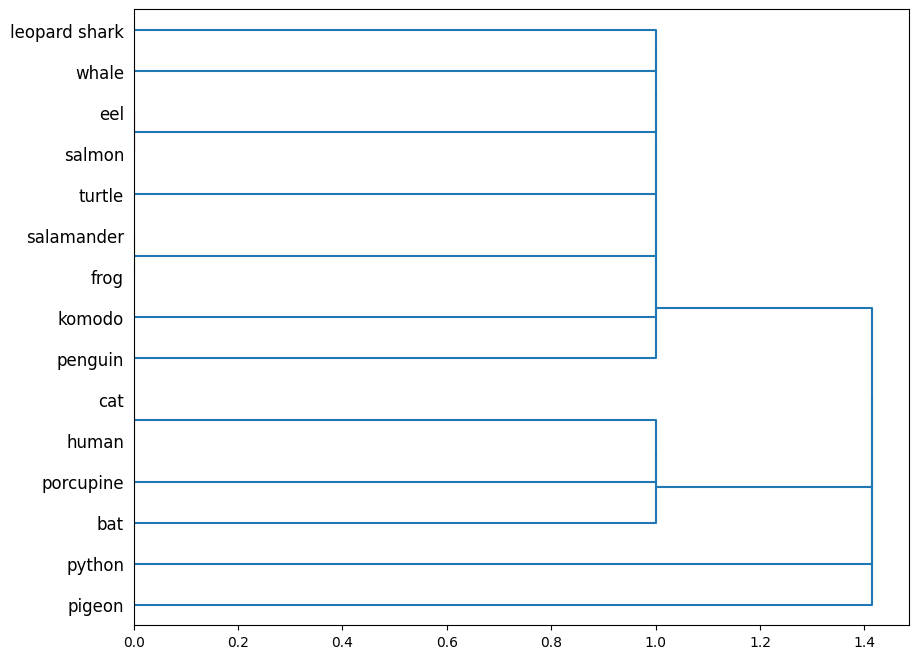

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt


names = data['Name']
Y = data['Class']
X = data.drop(['Name', 'Class'], axis=1)

# Use `.to_numpy()` to convert DataFrame to numpy array
Z = hierarchy.linkage(X.to_numpy(), method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')
plt.show()

This dendrogram visualizes the hierarchical clustering of various animals based on their features, with each branch representing the similarity between species. Here’s a breakdown of what it shows:

**Structure of Clusters:**

* At the base, each species starts as an individual cluster.
* As you move up, similar species are merged into clusters, and these clusters are then grouped with others, forming a hierarchy.

**Horizontal Lines:**

* Each horizontal line represents a merging point between clusters. The position of the line on the x-axis indicates the distance (or dissimilarity) between the merged clusters.
* Shorter distances (closer to 0) suggest higher similarity between species, whereas longer distances indicate more dissimilarity.

**Observations from the Clustering:**

* Animals like leopard shark, whale, eel, and salmon are clustered together, suggesting that they share certain characteristics, likely aquatic.
* Turtle and salamander are clustered together, indicating some similarity, possibly as reptiles or amphibians.
* Cat, human, and porcupine form another cluster, which could be related to characteristics shared by mammals.
* Bat clusters with this mammal group, perhaps due to its classification as a mammal despite its unique features like flight.
* Python and pigeon are separate initially, clustering at different stages, which could indicate unique characteristics distinguishing them from the rest.

**Interpretation of Cluster Heights:**

* The higher the horizontal line between clusters, the more dissimilar the groups are.
* For example, python and pigeon are joined at a higher level, indicating they are more distinct from other clusters.

**General Conclusion:**

* The dendrogram gives insight into the taxonomic or feature-based relationships between these species, grouping them based on similarity in a hierarchical structure.
* The "height" of each merge (in terms of x-axis distance) reflects how similar or different the species are, with closer merges indicating stronger similarity.

**Complete Link (MAX)**

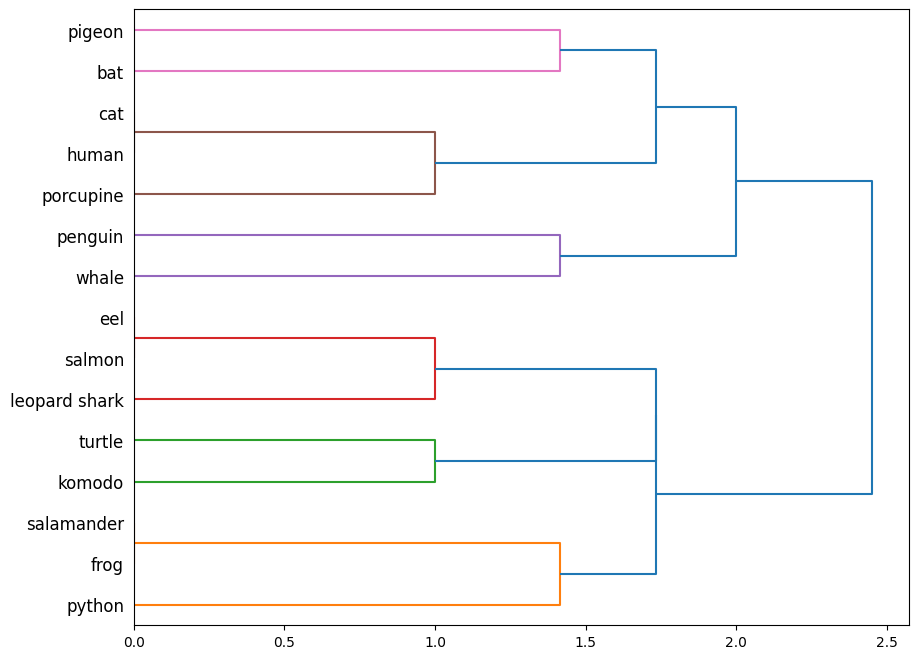

In [ ]:
Z = hierarchy.linkage(X.to_numpy(), method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')
plt.show()


This dendrogram illustrates the hierarchical clustering of various animal species based on the "complete link" method, which measures the distance between the most distant points in each cluster. Let's break down the shape, structure, and interpretation of this output:

**Structure of Clusters**
* The dendrogram begins with each animal as its own individual cluster at the bottom.
* As we move up, clusters are progressively merged based on their complete-link (or maximum distance) similarity until all animals are grouped into a single cluster at the top.

**Understanding Complete Link Clustering**
* Complete-link clustering prioritizes compact, well-separated clusters, as it considers the largest distance between any two members when joining clusters.
* This approach often yields clusters that are more spherical in shape, as it avoids elongated or chain-like structures.

**Interpreting the Dendrogram**

Branch Lengths:

* The horizontal length of each branch represents the "distance" or dissimilarity between clusters. The further apart two clusters are on the horizontal axis, the more distinct they are.
* For example, pigeon and bat are combined at a low distance, meaning they are quite similar based on the chosen features. However, frog and python only merge with other clusters at a greater distance, suggesting they are quite distinct from many other animals in this dataset.

**Cluster Groupings:**

* Aquatic Group: Animals like whale, eel, salmon, and leopard shark are grouped together, which likely indicates shared aquatic features.
* Reptiles and Amphibians: Turtle and komodo join early, suggesting shared characteristics, possibly due to being reptiles.
* Mammals: Cat, human, porcupine, and bat are clustered together, suggesting common mammalian traits.
* Outliers or Unique Clusters: Python and frog appear to be more distinct, joining other clusters only at a higher distance level, which may indicate that these animals share fewer characteristics with other clusters or each other.

**Hierarchy and Similarity:**

* Closer merges on the x-axis indicate higher similarity. For instance, whale and penguin are merged at a shorter distance, hinting at shared aquatic or environmental adaptations, even though one is a mammal and the other a bird.
* As the dendrogram progresses to the right, clusters of clusters merge, showing increasingly less similarity.


**General Conclusion**

This dendrogram suggests logical groupings based on certain features that differentiate animals by type (mammal, bird, reptile, aquatic) and possibly other characteristics like environment or anatomy. Complete-link clustering has helped form relatively compact, distinguishable groups, with some species (like frog and python) standing out as more unique in the context of this dataset.

**Group Average**

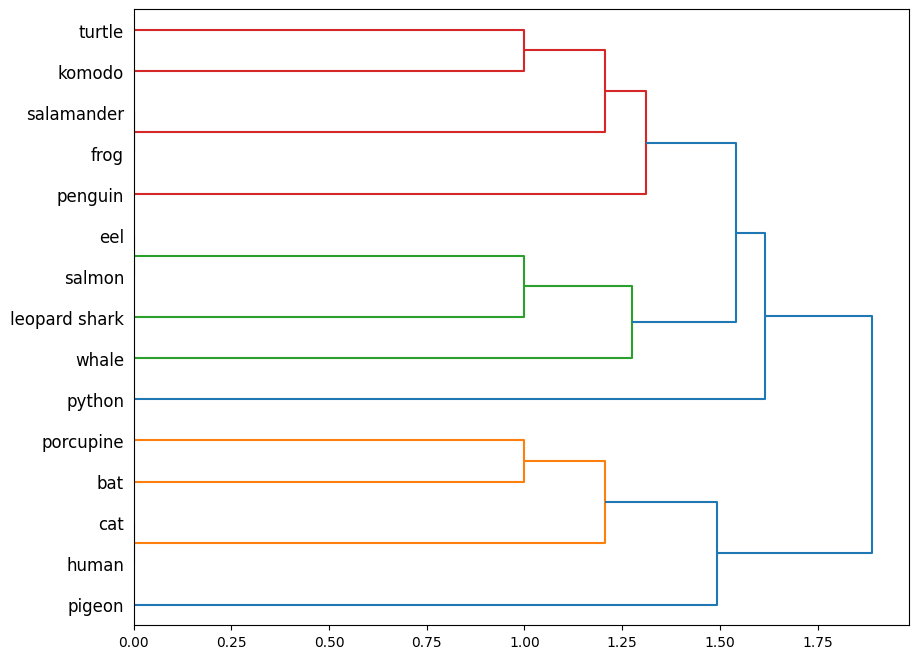

In [ ]:
Z = hierarchy.linkage(X.to_numpy(), method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 8)) #adjust for beteer readability
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')
plt.show()


This dendrogram is a visualization of hierarchical clustering using the average linkage method, which calculates the average distance between all pairs of data points in two clusters. Let's analyze its structure, similarities, and interpretations.

**Cluster Structure**

* At the base of the dendrogram, each animal starts as its own cluster.
* As we move up, clusters are progressively merged based on the average similarity, until all animals are grouped into one large cluster at the top.

**Horizontal Branch Lengths**

* The horizontal lines represent the "distance" or dissimilarity between merged clusters.
* The greater the horizontal distance between two clusters, the more dissimilar they are. Shorter distances indicate higher similarity.

**Interpretation of Groupings**

* Cluster of Reptiles/Amphibians: Turtle, Komodo, Salamander, and Frog are grouped closely together with relatively short distances between them, suggesting they share similar features, possibly due to their classification as reptiles and amphibians.
* Aquatic Cluster: Eel, Salmon, Leopard Shark, and Whale are grouped into another cluster, indicating a likely shared environment (aquatic) or similar physical characteristics suited for aquatic life.
* Mammal Cluster: Human, Cat, Bat, and Porcupine form another cluster, which may be due to their mammalian characteristics. Pigeon is joined at a slightly higher level, indicating it shares some characteristics but is more distinct (e.g., it's a bird, unlike the others).

**Key Observations**

* Distinct Outliers: Python clusters at a higher distance, suggesting it’s relatively distinct from both the reptile/amphibian group and other animals in terms of the features used in this analysis.
* Similarity Within Clusters: Each cluster seems to reflect logical groupings based on either taxonomy or ecological similarity, which is the goal of average linkage clustering to balance between compactness and separation.
* Hierarchical Relationships: The structure indicates that the dendrogram successfully represents hierarchical relationships, with animal groups merging gradually based on their similarity.

**General Conclusions**

This dendrogram provides insight into the relationships among these animals based on chosen features, with animals grouped by similarity. Average linkage clustering effectively balances cluster compactness with separation, yielding clear, interpretable groups while showing distinctions within each major category.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

numClusters = [1, 2, 3, 4, 5, 6]
SSE = []

for k in numClusters:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

# Plotting the SSE against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(numClusters, SSE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


ValueError: could not convert string to float: 'human'


The **Elbow Method** plot shows the Sum of Squared Errors (SSE) for different numbers of clusters. The goal is to find the optimal number of clusters by identifying the "elbow point," where the rate of decrease in SSE starts to level off. This point indicates that adding more clusters does not significantly improve the clustering and may lead to overfitting.

**Interpretation of the Elbow Plot:**

* Sharp Drop from 1 to 2 Clusters: There is a significant reduction in SSE when moving from 1 to 2 clusters, indicating that separating the data into at least 2 clusters explains much of the variance.

* Gradual Decrease from 2 to 6 Clusters: After 2 clusters, the reduction in SSE becomes more gradual, suggesting diminishing returns in adding more clusters.

* The decrease is relatively smooth, but the rate of improvement starts to flatten noticeably after 3 clusters.

* Optimal Number of Clusters: The "elbow" or inflection point appears around 2 or 3 clusters.

* 2 clusters may capture the main separation in the data, especially if you want a simpler model.

* 3 clusters might provide additional separation without over-complicating the model, especially if there is a logical reason (e.g., distinct groups within the vertebrate dataset).


For the vertebrate data, 2 or 3 clusters would likely be optimal. You may select 3 clusters if you want slightly more granularity, while 2 clusters could suffice for a simpler division. The choice depends on the level of detail required for your analysis.

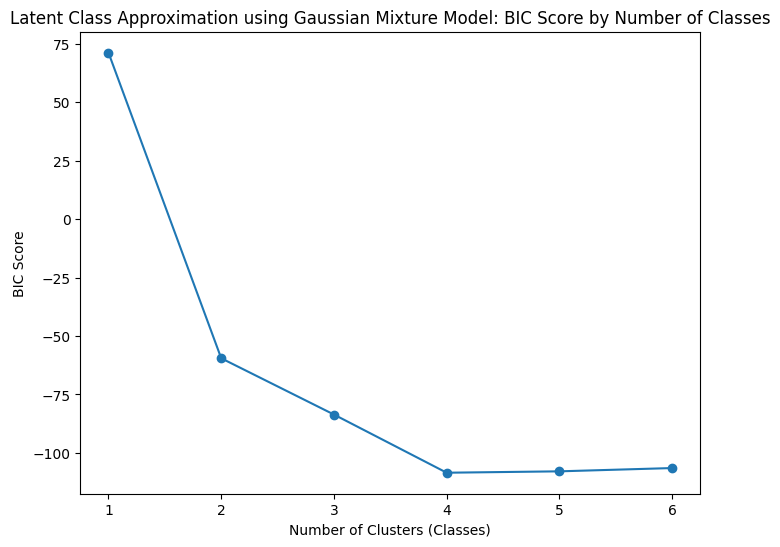

BIC Scores for Different Numbers of Clusters:
   Number of Clusters   BIC Score
0                   1   71.230802
1                   2  -59.516680
2                   3  -83.599413
3                   4 -108.493075
4                   5 -107.899751
5                   6 -106.495497

Optimal Number of Clusters (based on minimum BIC):
Number of Clusters: 4.0, BIC Score: -108.49307520095877


In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Define the number of clusters (classes) to test
numClusters = [1, 2, 3, 4, 5, 6]
BIC_scores = []

# Perform Gaussian Mixture Model for each cluster count
for k in numClusters:
    gmm = GaussianMixture(n_components=k, random_state=0)  # Initialize GMM
    gmm.fit(data)  # Fit the model to the data
    BIC_scores.append(gmm.bic(data))  # Store the BIC score for each number of clusters

# Plot the BIC scores to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(numClusters, BIC_scores, marker='o')
plt.xlabel('Number of Clusters (Classes)')
plt.ylabel('BIC Score')
plt.title('Latent Class Approximation using Gaussian Mixture Model: BIC Score by Number of Classes')
plt.show()

bic_table = pd.DataFrame({'Number of Clusters': numClusters, 'BIC Score': BIC_scores})

# Identify the optimal number of clusters (lowest BIC score)
optimal_clusters = bic_table.loc[bic_table['BIC Score'].idxmin()]

# Make the BIC scores table and the optimal number of clusters
print("BIC Scores for Different Numbers of Clusters:")
print(bic_table)
print("\nOptimal Number of Clusters (based on minimum BIC):")
print(f"Number of Clusters: {optimal_clusters['Number of Clusters']}, BIC Score: {optimal_clusters['BIC Score']}")